In [68]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
%cd /content/gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [2]:
# load all data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [3]:
dataset.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [5]:
# mark all missing values
dataset.replace('?', np.nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')

In [6]:
dataset.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


In [8]:
# fill all the missing values with the mean (average) of their attribute/column
dataset = dataset.fillna({'Global_active_power':dataset['Global_active_power'].mean(), 'Global_reactive_power':dataset['Global_reactive_power'].mean(),
           'Voltage':dataset['Voltage'].mean(), 'Global_intensity':dataset['Global_intensity'].mean(),
           'Sub_metering_1':dataset['Sub_metering_1'].mean(), 'Sub_metering_2':dataset['Sub_metering_2'].mean(),
           'Sub_metering_3':dataset['Sub_metering_3'].mean()})

In [9]:
dataset.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
new_dataset = dataset.copy()

In [11]:
new_dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0


In [12]:
new_dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091373e+00,1.237164e-01,2.435335e+02,4.630594e+00,1.121211e+00,1.298031e+00,6.454503e+00
std,1.050167e+00,1.121103e-01,4.183342e+00,4.412327e+00,6.065988e+00,5.722075e+00,8.405821e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.410500e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.429700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [13]:
# resample data to daily
daily_data = new_dataset.resample('D').sum()
# summarize
print(daily_data.shape)
print(daily_data.head())

(1442, 7)
            Global_active_power  ...  Sub_metering_3
datetime                         ...                
2006-12-16          1209.176025  ...          4926.0
2006-12-17          3390.459961  ...         13341.0
2006-12-18          2203.825928  ...         14018.0
2006-12-19          1666.193970  ...          6197.0
2006-12-20          2225.748047  ...         14063.0

[5 rows x 7 columns]


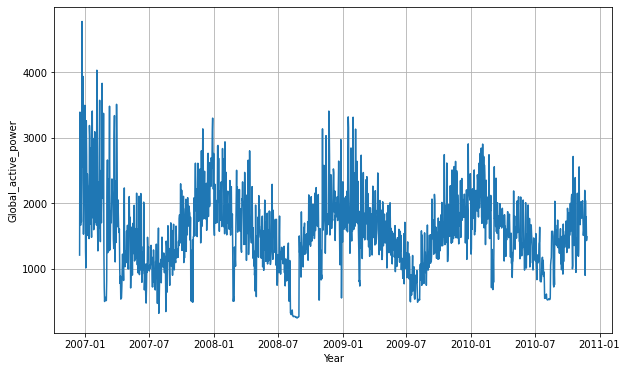

In [14]:
# plot to visualize the series using 'Global_active_power' column
plt.figure(figsize=(10,6))
plt.plot(daily_data.index, daily_data['Global_active_power'], '-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.show()

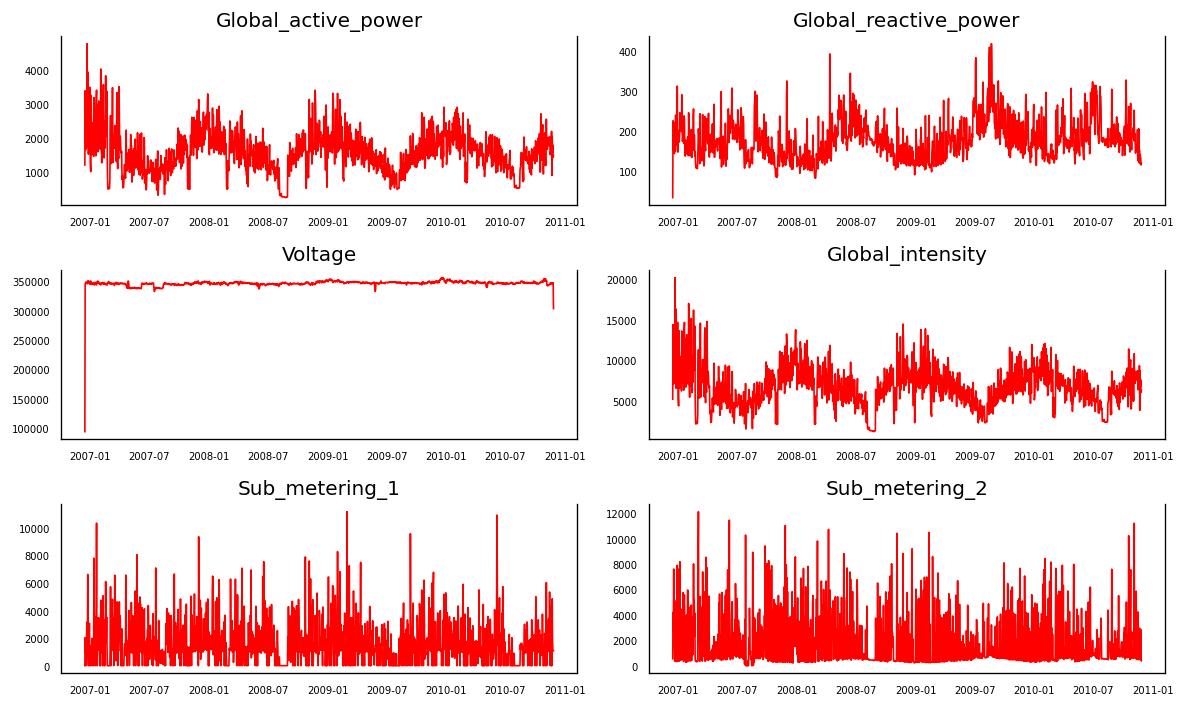

In [15]:
#Visualize the Time Series
# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = daily_data[daily_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(daily_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [16]:
len(daily_data)

1442

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


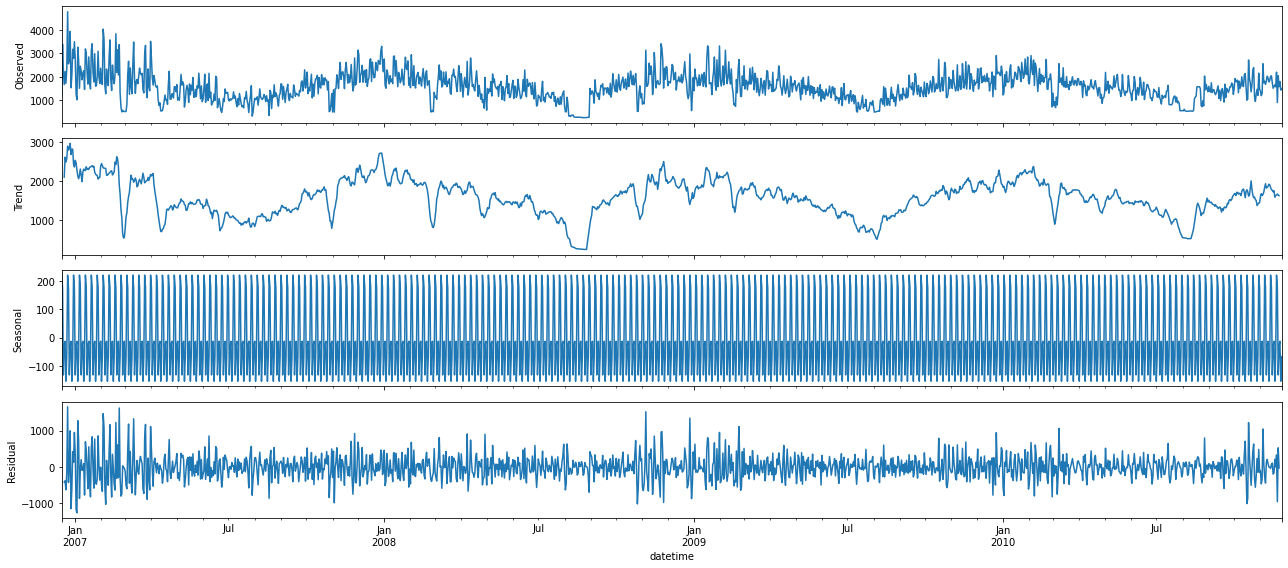

In [17]:
# Decomposition plot
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
daily = sm.tsa.seasonal_decompose(daily_data['Global_active_power'], model='additive')
daily.plot()
plt.show()

In [18]:
# ADF TEST 
from statsmodels.tsa.stattools import adfuller
# Stationarity check
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print('Augmented Dickey-Fuller Test: Global_active_power Time Series')
augmented_dickey_fuller_statistics(daily_data['Global_active_power'])
print('Augmented Dickey-Fuller Test: sub_metering_4 Time Series')
#augmented_dickey_fuller_statistics(daily_data['sub_metering_4'])
print('Augmented Dickey-Fuller Test: Sub_metering_3 Time Series')
augmented_dickey_fuller_statistics(daily_data['Sub_metering_3'])


Augmented Dickey-Fuller Test: Global_active_power Time Series
ADF Statistic: -3.731705
p-value: 0.003689
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Augmented Dickey-Fuller Test: sub_metering_4 Time Series
Augmented Dickey-Fuller Test: Sub_metering_3 Time Series
ADF Statistic: -4.062034
p-value: 0.001118
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


The dataset is stationary

In [21]:
from scipy.stats import pearsonr
corr, _ = pearsonr(daily_data.Global_active_power, daily_data.Global_reactive_power)
corr

0.04109788470945897

In [22]:
from scipy.stats import pearsonr
corr, _ = pearsonr(new_dataset.Global_active_power, new_dataset.Global_reactive_power)
corr

0.24701705251195766

In [23]:
from scipy.stats import pearsonr
corr, _ = pearsonr(daily_data.Voltage, daily_data.Global_intensity)
corr

0.05221350712869457

In [24]:
from scipy.stats import pearsonr
corr, _ = pearsonr(new_dataset.Voltage, new_dataset.Global_intensity)
corr

-0.40978463272793664

In [25]:
daily_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [26]:
# resetting the index
daily_data1 = daily_data.reset_index()
daily_data1.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [27]:
daily_data1 = daily_data1[['datetime','Global_active_power']]

In [28]:
daily_data1 = daily_data1.rename(columns={"datetime": "ds", "Global_active_power": "y"})
daily_data1.head()

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928
3,2006-12-19,1666.193970
4,2006-12-20,2225.748047


In [29]:
# Split the Series into Training and Testing Data, I will hold back the last 365 days
n_obs = 365
X_train, X_test = daily_data1[0:-n_obs], daily_data1[-n_obs:]
# Check size
print(X_train.shape)
print(X_test.shape)

(1077, 2)
(365, 2)


## Modeling Facebook Prophet Univariate Time series

In [30]:
from fbprophet import Prophet
model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
# predicting for the next 365 days
future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(future) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1650.071328,1871.841839,2967.541603,1650.071328,1650.071328,775.004842,775.004842,775.004842,245.813256,245.813256,245.813256,529.191586,529.191586,529.191586,0.0,0.0,0.0,2425.076170
1,2006-12-17,1649.910702,1884.134671,3021.419664,1649.910702,1649.910702,771.844221,771.844221,771.844221,228.519177,228.519177,228.519177,543.325044,543.325044,543.325044,0.0,0.0,0.0,2421.754924
2,2006-12-18,1649.750077,1501.150594,2602.670172,1649.750077,1649.750077,397.001867,397.001867,397.001867,-161.286790,-161.286790,-161.286790,558.288657,558.288657,558.288657,0.0,0.0,0.0,2046.751944
3,2006-12-19,1649.589452,1602.723026,2778.429155,1649.589452,1649.589452,544.306666,544.306666,544.306666,-29.332428,-29.332428,-29.332428,573.639094,573.639094,573.639094,0.0,0.0,0.0,2193.896118
4,2006-12-20,1649.428826,1664.909409,2766.821996,1649.428826,1649.428826,564.208290,564.208290,564.208290,-24.708851,-24.708851,-24.708851,588.917141,588.917141,588.917141,0.0,0.0,0.0,2213.637116


In [32]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2425.076170,1871.841839,2967.541603,1650.071328,1650.071328,1650.071328
1,2006-12-17,2421.754924,1884.134671,3021.419664,1649.910702,1649.910702,1649.910702
2,2006-12-18,2046.751944,1501.150594,2602.670172,1649.750077,1649.750077,1649.750077
3,2006-12-19,2193.896118,1602.723026,2778.429155,1649.589452,1649.589452,1649.589452
4,2006-12-20,2213.637116,1664.909409,2766.821996,1649.428826,1649.428826,1649.428826
...,...,...,...,...,...,...,...
1437,2010-11-22,2033.303188,1504.077418,2586.472786,1624.637098,1613.901247,1636.646136
1438,2010-11-23,2175.400926,1630.296126,2728.020505,1624.760856,1613.980904,1636.812083
1439,2010-11-24,2186.381959,1618.401237,2749.372890,1624.884615,1614.044684,1636.942702
1440,2010-11-25,2018.977159,1457.184671,2577.031670,1625.008373,1614.117549,1637.059176


In [33]:
#mape metric function
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [34]:
# true y values
test_val = X_test['y']
# predicted y values
pred_val = forecast['yhat'][-365:] 

In [35]:
# mape metric test on univariate data
prediction = mape(test_val, pred_val)
print('MAPE prediction: ', round(prediction, 2)) # rounds prediction to 2dp

MAPE prediction:  20.82


In [36]:
# rmse metric function
def rmse(y_true, y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [37]:
rmse = rmse(test_val, pred_val)
print('RMSE prediction: ', round(rmse, 2)) # rounds prediction to 2dp

RMSE prediction:  374.6


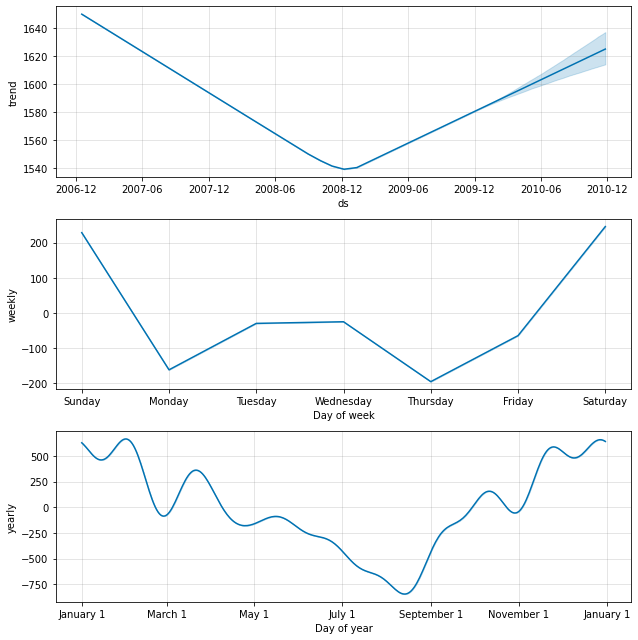

In [38]:
# plotting the components
model.plot_components(forecast)
plt.show()

## Modeling Facebook Prophet Multivariate Time series

In [39]:
# resetting the index
daily_data2 = daily_data.reset_index()
daily_data2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [40]:
# renaming the columns
daily_data2 = daily_data2.rename(columns={'datetime':'ds', 'Global_active_power':'y', 'Global_reactive_power':'add1', 'Voltage':'add2', 'Global_intensity':'add3', 'Sub_metering_1':'add4', 'Sub_metering_2':'add5', 'Sub_metering_3':'add6', 'sub_metering_4':'add7'})
print(daily_data2.shape)
daily_data2.head()

(1442, 8)


,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [47]:
# Split the Series into Training and Testing Data, I will hold back the last 365 days
n_obs = 365
train, test = daily_data2[0:-n_obs], daily_data2[-n_obs:]
# Check size
print(train.shape)
print(test.shape)

(1077, 8)
(365, 8)


In [48]:
# create the model 
model2 = Prophet()

In [49]:
# adding reressor 
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')

In [50]:
# fit the model
model2.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
# predicting for the next 365 days
future2 = model2.make_future_dataframe(periods=365, freq='D') 
future2

,ds
0,2006-12-16
1,2006-12-17
2,2006-12-18
3,2006-12-19
4,2006-12-20
...,...
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25


In [52]:
# adding the other 6 independent variables to the future dataframe before making predictions
future2['add1'] = daily_data2['add1']
future2['add2'] = daily_data2['add2']
future2['add3'] = daily_data2['add3']
future2['add4'] = daily_data2['add4']
future2['add5'] = daily_data2['add5']
future2['add6'] = daily_data2['add6']
#future2['add7'] = daily_data2['add7']

In [53]:
# making predictions
forecast2 = model2.predict(future2) 
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1567.126647,1157.987257,1189.271260,1567.126647,1567.126647,24.950217,24.950217,24.950217,-73.680966,-73.680966,-73.680966,-356.983476,-356.983476,-356.983476,2.202791,2.202791,2.202791,0.746432,0.746432,0.746432,-5.563238,-5.563238,-5.563238,-393.447514,-393.447514,-393.447514,-408.328241,-408.328241,-408.328241,1.386425,1.386425,1.386425,13.494303,13.494303,13.494303,0.0,0.0,0.0,1173.679133
1,2006-12-17,1567.059235,3400.096256,3432.176778,1567.059235,1567.059235,-8.997388,-8.997388,-8.997388,-0.128164,-0.128164,-0.128164,1839.108159,1839.108159,1839.108159,-0.486178,-0.486178,-0.486178,-1.176427,-1.176427,-1.176427,6.326211,6.326211,6.326211,1848.972623,1848.972623,1848.972623,1834.646212,1834.646212,1834.646212,0.141167,0.141167,0.141167,14.185244,14.185244,14.185244,0.0,0.0,0.0,3416.031857
2,2006-12-18,1566.991822,2188.137651,2219.575119,1566.991822,1566.991822,2.410742,2.410742,2.410742,0.352609,0.352609,0.352609,611.814767,611.814767,611.814767,0.796803,0.796803,0.796803,-0.349402,-0.349402,-0.349402,7.282736,7.282736,7.282736,636.788013,636.788013,636.788013,622.308254,622.308254,622.308254,-0.334593,-0.334593,-0.334593,14.814351,14.814351,14.814351,0.0,0.0,0.0,2203.779834
3,2006-12-19,1566.924409,1662.471561,1694.396668,1566.924409,1566.924409,4.338333,4.338333,4.338333,0.675021,0.675021,0.675021,98.826283,98.826283,98.826283,1.093079,1.093079,1.093079,-2.979933,-2.979933,-2.979933,-3.767458,-3.767458,-3.767458,111.897379,111.897379,111.897379,98.185325,98.185325,98.185325,-1.658690,-1.658690,-1.658690,15.370745,15.370745,15.370745,0.0,0.0,0.0,1678.821788
4,2006-12-20,1566.856996,2207.282794,2240.527847,1566.856996,1566.856996,2.551804,2.551804,2.551804,0.804707,0.804707,0.804707,627.491240,627.491240,627.491240,2.202791,2.202791,2.202791,-0.363661,-0.363661,-0.363661,7.346316,7.346316,7.346316,656.989286,656.989286,656.989286,640.033196,640.033196,640.033196,1.111745,1.111745,1.111745,15.844345,15.844345,15.844345,0.0,0.0,0.0,2223.846282


In [54]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,1173.679133,1157.987257,1189.271260,1567.126647,1567.126647,1567.126647
1,2006-12-17,3416.031857,3400.096256,3432.176778,1567.059235,1567.059235,1567.059235
2,2006-12-18,2203.779834,2188.137651,2219.575119,1566.991822,1566.991822,1566.991822
3,2006-12-19,1678.821788,1662.471561,1694.396668,1566.924409,1566.924409,1566.924409
4,2006-12-20,2223.846282,2207.282794,2240.527847,1566.856996,1566.856996,1566.856996
...,...,...,...,...,...,...,...
1437,2010-11-22,2122.888273,1845.306117,2434.688770,1647.861034,1370.011616,1957.965388
1438,2010-11-23,1664.591806,1383.224765,1978.914912,1648.001739,1368.391058,1960.057067
1439,2010-11-24,1871.987879,1593.760968,2189.521572,1648.142444,1366.770500,1961.103176
1440,2010-11-25,1494.885275,1215.532090,1812.742177,1648.283149,1365.589702,1962.473815


In [55]:
# true y values
test_val2 = test['y']
# predicted y values
pred_val2 = forecast2['yhat'][-365:] 

In [56]:
# mape metric test on multivariate data
prediction2 = mape(test_val2, pred_val2)
print('MAPE prediction: ', round(prediction2, 2)) # rounds the mape value to 2 dp

MAPE prediction:  3.04


In [57]:
#rmse metric 
from sklearn.metrics import mean_squared_error
rmse2 = mean_squared_error(test_val2, pred_val2)
# taking the sqrt of the mse to get the rmse
pred_rmse2 = np.sqrt(rmse2)
print('RMSE prediction: ', round(pred_rmse2, 2))

RMSE prediction:  44.88


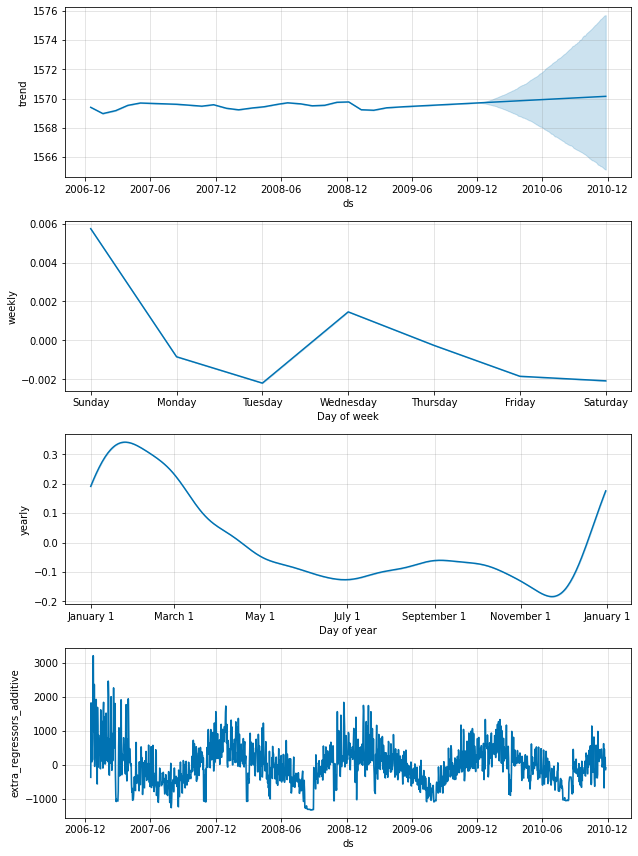

In [115]:
# plotting the components
model2.plot_components(forecast2)
plt.show()